In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer


In [2]:
# Load the data
data = pd.read_csv('data.csv')

In [3]:
# Separate the target from the predictors
X = data.drop(columns=['death'])
y = data['death']


In [4]:

# Create an imputer object that replaces NaN values with the most frequent value of the column
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the dataframe
X_imputed = imputer.fit_transform(X)

# Now, X_imputed is a numpy array. Convert it back to a DataFrame like this:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Identify numerical columns (excluding boolean columns)
numerical_cols = X_imputed.select_dtypes(include=['int64', 'float64']).columns
boolean_cols = X_imputed.columns[X_imputed.nunique() <= 2]
numerical_cols = numerical_cols.difference(boolean_cols)

# Initialize a scaler object
scaler = MinMaxScaler()

# Fit and transform the numerical columns
X_imputed[numerical_cols] = scaler.fit_transform(X_imputed[numerical_cols])

# Assuming X_scaled is a pandas DataFrame
df = pd.DataFrame(X_imputed)
df.to_csv('X_imputed.csv', index=False)

In [5]:


# Apply PCA to the scaled predictors
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_imputed)

# Display the explained variance ratio for each principal component
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate the target variable
finalDf = pd.concat([principalDf, y.reset_index(drop=True)], axis=1) # Reset index before concatenating



Explained variance ratio: [0.12330495 0.10776581]


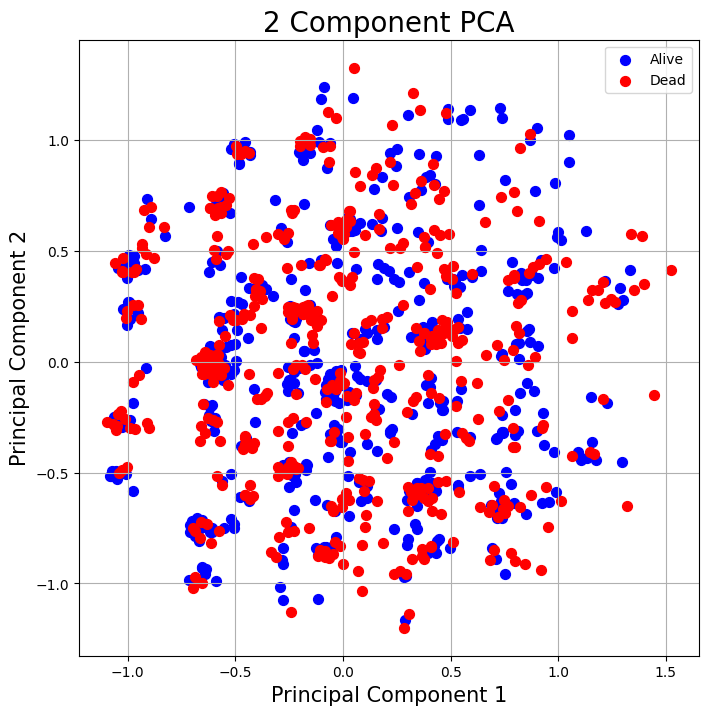

In [6]:
# Plot the first two principal components
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['b', 'r'] # switched colors
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['death'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Alive', 'Dead']) # replaced labels
ax.grid()
plt.show()

c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


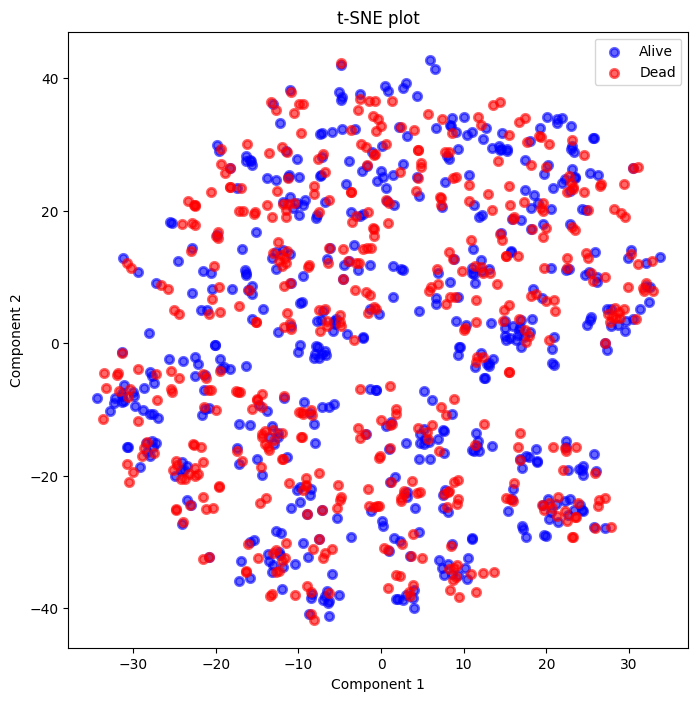

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE to the imputed and scaled data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_imputed)

# Create a DataFrame with the two components
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])

# Concatenate the target variable
final_df = pd.concat([tsne_df, y.reset_index(drop=True)], axis=1)

# Plot the first two t-SNE components
plt.figure(figsize=(8,8))
colors = ['b', 'r']
for color, i, target in zip(colors, [0, 1], ['Alive', 'Dead']):
    plt.scatter(final_df.loc[final_df['death'] == i, 'Component 1'], final_df.loc[final_df['death'] == i, 'Component 2'], color=color, alpha=.6, lw=2, label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


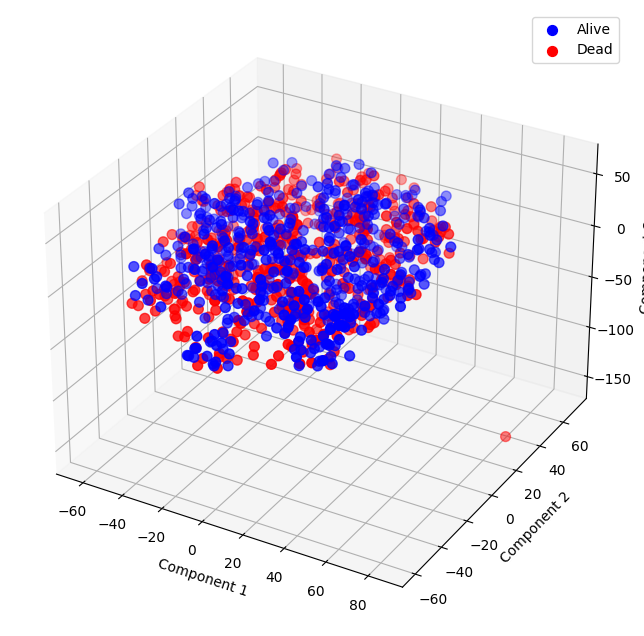

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE to the imputed and scaled data with 3 components
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_imputed)

# Create a DataFrame with the three components
tsne_df_3d = pd.DataFrame(data=X_tsne_3d, columns=['Component 1', 'Component 2', 'Component 3'])

# Concatenate the target variable
final_df_3d = pd.concat([tsne_df_3d, y.reset_index(drop=True)], axis=1)

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

targets = [0, 1]
colors = ['b', 'r']

for target, color in zip(targets, colors):
    indices_to_keep = final_df_3d['death'] == target
    ax.scatter(final_df_3d.loc[indices_to_keep, 'Component 1'],
               final_df_3d.loc[indices_to_keep, 'Component 2'],
               final_df_3d.loc[indices_to_keep, 'Component 3'],
               c=color, s=50)

ax.legend(['Alive', 'Dead'])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\galle\AppData\Local\Programs\Python\Python3

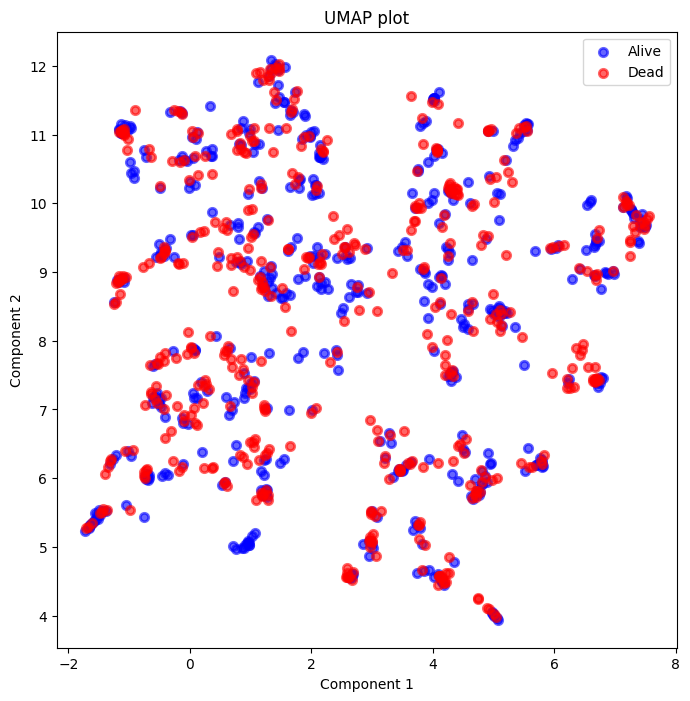

In [9]:
import umap.umap_ as umap

# Apply UMAP to the data
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X_imputed)

# Create a DataFrame with the two components
umap_df = pd.DataFrame(data=embedding, columns=['Component 1', 'Component 2'])

# Concatenate the target variable
final_df_umap = pd.concat([umap_df, y.reset_index(drop=True)], axis=1)

# Plot the first two UMAP components
plt.figure(figsize=(8,8))
colors = ['b', 'r']
for color, i, target in zip(colors, [0, 1], ['Alive', 'Dead']):
    plt.scatter(final_df_umap.loc[final_df_umap['death'] == i, 'Component 1'], 
                final_df_umap.loc[final_df_umap['death'] == i, 'Component 2'], color=color, alpha=.6, lw=2, label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('UMAP plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
